In [1]:
import numpy as np # used for linspace and interp
import pandas as pd # used for reading csv and data cleaning
# sklearn for various operations 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
# matplotlib for plotting graph
import matplotlib.pylab as plt
import matplotlib.patches as patches

In [2]:
#for suprressing unnecessary warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.filterwarnings("ignore")

In [3]:
#reading data
data = pd.read_csv('churn.csv')
#dropping unwanted column
data.drop('Unnamed: 0',axis=1, inplace=True)

In [4]:
#data glance
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,?,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,?,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,?,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
#cloumns present in data
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [6]:
#having a look at unique values present in different columns
for i in data.columns:
    print(i)
    print(data[i].unique())
    print('\n')

State
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


Account Length
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243

In [7]:
# decision
# dropping phone as it does not make sense as a feature
# for day charge and similar columns we should be replacing '?' with 0 
# as these dtypes is int and '?' is unexpected.

In [8]:
# column phone could not be considered as feature for prediction
data.drop('Phone', axis=1, inplace=True)

In [9]:
#changing '?' with 0 used list comprehension for getting indexes of columns with "?" as value

data['Day Charge'].iloc[[idx for idx,value in enumerate(data['Day Charge']) if value == '?']]='0'
data['Eve Mins'].iloc[[idx for idx,value in enumerate(data['Eve Mins']) if value == '?']]='0'
data['Eve Calls'].iloc[[idx for idx,value in enumerate(data['Eve Calls']) if value == '?']]='0'
data['Night Charge'].iloc[[idx for idx,value in enumerate(data['Night Charge']) if value == '?']]='0'
data['Intl Calls'].iloc[[idx for idx,value in enumerate(data['Intl Calls']) if value == '?']]='0'
data['Intl Charge'].iloc[[idx for idx,value in enumerate(data['Intl Charge']) if value == '?']]='0'

In [10]:
#changing str to float
#list of columns whose dtypes should be changed
ls_int = ['Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',\
          'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
         'Intl Charge', 'CustServ Calls']
for i in ls_int:
    data[i] = data[i].astype(float)

In [11]:
# list of columns with categorical columns values
ls_cate = ['State','Area Code',"Int'l Plan", 'VMail Plan', 'Churn?']

In [12]:
# label encoding, changing the categorical value to numerical values
for i in ls_cate:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(data[i])
    data[i]= label_encoder.transform(data[i])

In [13]:
#imported lightgbm a boosting method for classification but randomforest gave good results
# import lightgbm as lgb
# clf_model = lgb.LGBMClassifier(num_leaves=31,
#     max_depth=7,
#     learning_rate=0.1,
#     n_estimators=80,
#     subsample_for_bin=200000,
#     objective=None,
#     class_weight=None,
#     min_split_gain=0.0,
#     min_child_weight=0.01,
#     min_child_samples=20,
#     subsample=1.0,
#     subsample_freq=0,
#     colsample_bytree=1.0,
#     reg_alpha=0.0,
#     reg_lambda=0.0,
#     random_state=20012,
#     n_jobs=-1,
#     silent=False,
#     importance_type='split')

In [14]:
#defining random forest classifier
clf_model = RandomForestClassifier(n_estimators=200,
    criterion='gini',
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=20012,
    verbose=0,
    warm_start=True,)

In [15]:
#creating stratified(balanced split over all classes) kfold object
cv_kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [16]:
#defining x(features) and y(target variables)
x = data.loc[:, data.columns != 'Churn?']
y = data['Churn?']

for 1 fold auc score is  0.8909416398138202
for 2 fold auc score is  0.9647690655209452
for 3 fold auc score is  0.9704260651629073
for 4 fold auc score is  0.9559210526315789
for 5 fold auc score is  0.9344298245614036
for 6 fold auc score is  0.9478070175438595
for 7 fold auc score is  0.9903508771929824
for 8 fold auc score is  0.9599415204678363
for 9 fold auc score is  0.9928362573099416
for 10 fold auc score is  0.9644005847953216
Mean AUC score-  0.9571823905000596


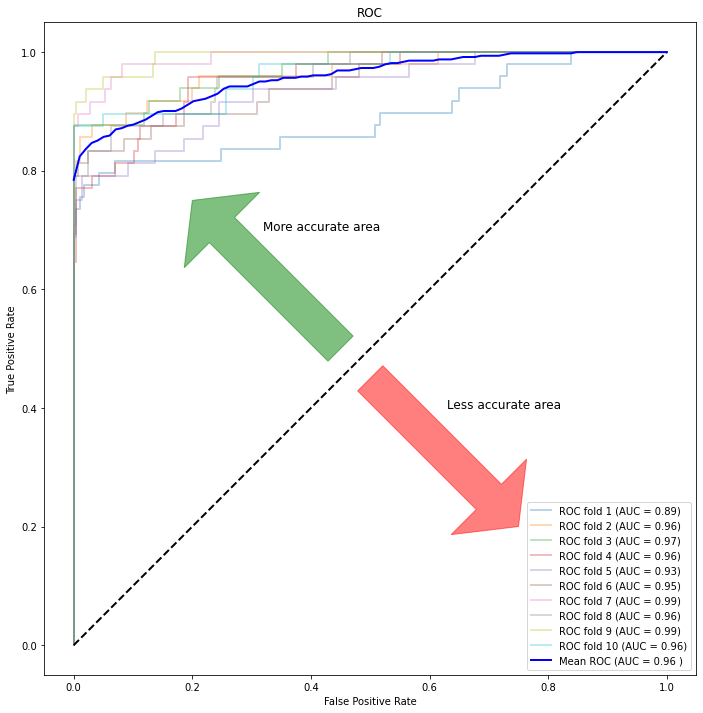

In [17]:
# creating a figure for plot
fig1 = plt.figure(figsize=[12,12])
#adding a sub plot for arrows
ax1 = fig1.add_subplot(111,aspect = 'equal')
# adding arrows
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )
#list to store results from every kfold model training 
tprs = []
aucs = []
score_ = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv_kf.split(x,y):
    #getting prediction after model training
    prediction = clf_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    #calculating score directly using sklearn function
    score_.append(roc_auc_score(y[test], prediction[:, 1]))
    print('for {} fold auc score is '.format(i), roc_auc_score(y[test], prediction[:, 1]))
    #calculating false positive rate, true positive rate and threshold using roc_curve from sklearn
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1]) 
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    #getting area under curve
    roc_auc = auc(fpr, tpr)
    #appending roc_auc for calculating mean auc
    aucs.append(roc_auc)
    #plotting for every kfold model
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
print('Mean AUC score- ',np.mean(score_))
#adding a dotted seperator 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
#calculating mean tpr and auc
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
#final mean graph with mean values
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
#adding text(x axis and yaxis labels) to make it self explainatory
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
#fixing legend table position
plt.legend(loc="lower right")
#hard coded text for arrows
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()